In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import geopandas as gpd
import os

plt.style.use("seaborn-v0_8-whitegrid")

panel_path = Path("../data/processed/panel.csv")
df = pd.read_csv(panel_path)

print(f"Rozmiar danych: {df.shape}")
df.head()


Rozmiar danych: (368, 11)


,year,unit,crime,unemployment,population_density,avg_salary,public_safety_exp,education_exp,migration_balance,tourism_usage,inflation
0,2002,Dolnośląskie,41.33,NaN,145.6,2165.84,196377923.0,345259618.0,2572.0,26.9,NaN
1,2002,Kujawsko-Pomorskie,38.05,NaN,115.1,1953.39,111821148.0,187401964.0,-2088.0,30.3,NaN
2,2002,Lubelskie,29.90,NaN,87.5,1941.01,129845709.0,245911356.0,-8789.0,28.4,NaN
3,2002,Lubuskie,42.82,NaN,72.1,1936.54,76681402.0,128709824.0,-1144.0,28.8,NaN
4,2002,Mazowieckie,37.88,NaN,144.1,2893.83,280191981.0,414472170.0,12117.0,34.6,NaN


In [2]:
# Podstawowe informacje

print("\n--- Podstawowe informacje ---")
print(df.info())
print("\n--- Braki danych (%) ---")
print(df.isna().mean().round(3) * 100)
print("\n--- Statystyki opisowe ---")
display(df.describe().T)


--- Podstawowe informacje ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                368 non-null    int64  
 1   unit                368 non-null    object 
 2   crime               368 non-null    float64
 3   unemployment        336 non-null    float64
 4   population_density  368 non-null    float64
 5   avg_salary          368 non-null    float64
 6   public_safety_exp   368 non-null    float64
 7   education_exp       368 non-null    float64
 8   migration_balance   352 non-null    float64
 9   tourism_usage       368 non-null    float64
 10  inflation           352 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 31.8+ KB
None

--- Braki danych (%) ---
year                  0.0
unit                  0.0
crime                 0.0
unemployment          8.7
population_density    0.0
avg

,count,mean,std,min,25%,50%,75%,max
year,368.0,2.013000e+03,6.642281e+00,2.002000e+03,2.007000e+03,2.013000e+03,2.019000e+03,2.024000e+03
crime,368.0,2.622709e+01,8.279457e+00,1.102000e+01,1.975750e+01,2.518500e+01,3.182250e+01,5.212000e+01
unemployment,336.0,1.100089e+01,5.184745e+00,2.800000e+00,7.000000e+00,1.005000e+01,1.440000e+01,2.920000e+01
population_density,368.0,1.285171e+02,7.390436e+01,5.580000e+01,7.845000e+01,1.156000e+02,1.432750e+02,3.837000e+02
avg_salary,368.0,3.955353e+03,1.647133e+03,1.875410e+03,2.740812e+03,3.553870e+03,4.777583e+03,1.001871e+04
public_safety_exp,368.0,9.258726e+07,5.784664e+07,2.306149e+07,5.642609e+07,7.623670e+07,1.119246e+08,4.442339e+08
education_exp,368.0,4.800491e+08,2.924547e+08,1.062945e+08,2.797403e+08,4.081517e+08,5.901783e+08,2.226515e+09
migration_balance,352.0,0.000000e+00,4.636442e+03,-1.086600e+04,-2.839750e+03,-7.190000e+02,2.244250e+03,1.520600e+04
tourism_usage,368.0,3.474508e+01,6.887368e+00,1.950000e+01,2.984500e+01,3.350000e+01,3.790000e+01,5.790000e+01
inflation,352.0,1.032375e+02,3.489955e+00,9.830000e+01,1.011000e+02,1.026000e+02,1.039000e+02,1.161000e+02


In [4]:
print("Zakres lat:", df["year"].min(), "-", df["year"].max())
print("Liczba województw:", df["unit"].nunique())
print("Przykładowe województwa:", df["unit"].unique())

Zakres lat: 2002 - 2024
Liczba województw: 16
Przykładowe województwa: ['Dolnośląskie' 'Kujawsko-Pomorskie' 'Lubelskie' 'Lubuskie' 'Mazowieckie'
 'Małopolskie' 'Opolskie' 'Podkarpackie' 'Podlaskie' 'Pomorskie'
 'Warmińsko-Mazurskie' 'Wielkopolskie' 'Zachodniopomorskie' 'Łódzkie'
 'Śląskie' 'Świętokrzyskie']


In [ ]:
# upewniamy się, że folder istnieje
os.makedirs("output/histograms", exist_ok=True)

# lista zmiennych do histogramów
variables = [
    "crime",
    "unemployment",
    "population_density",
    "avg_salary",
    "public_safety_exp",
    "education_exp",
    "migration_balance",
    "tourism_usage",
    "inflation"
]

# styl wykresów
sns.set(style="whitegrid")

for var in variables:
    plt.figure(figsize=(8,5))
    sns.histplot(df[var].dropna(), kde=True, bins=25, color="steelblue")
    plt.title(f"Histogram zmiennej: {var}")
    plt.xlabel(var)
    plt.ylabel("Liczność")

    # zapis do pliku
    filename = f"output/histograms/{var}_hist.png"
    plt.savefig(filename, dpi=120, bbox_inches="tight")
    plt.show()

    print(f"Zapisano: {filename}")


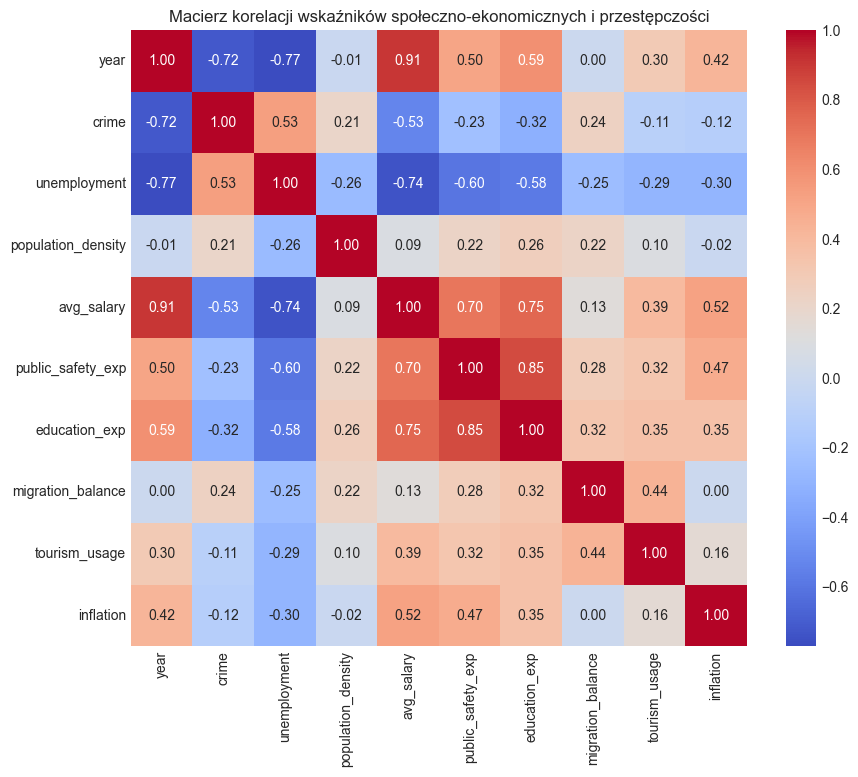

In [3]:
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Macierz korelacji wskaźników społeczno-ekonomicznych i przestępczości")
plt.show()

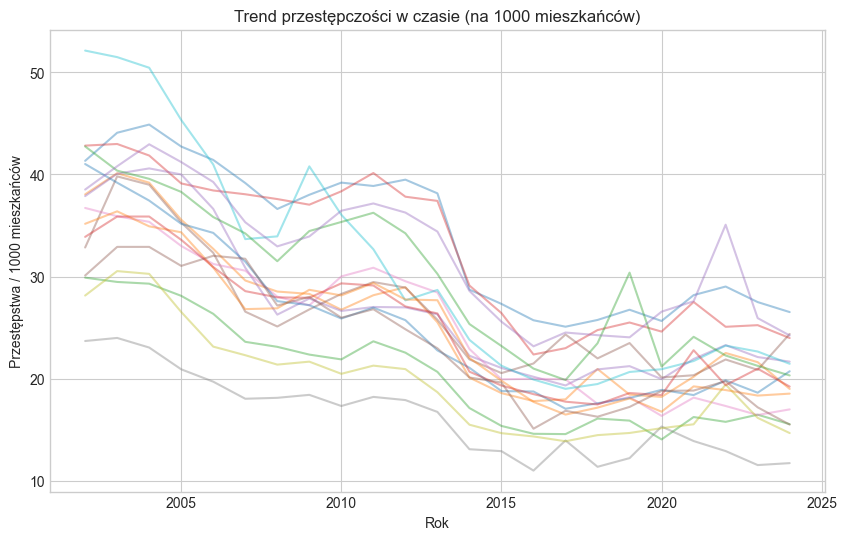

In [6]:
plt.figure(figsize=(10,6))
for region in df["unit"].unique():
    plt.plot(df[df["unit"] == region]["year"], df[df["unit"] == region]["crime"], alpha=0.4)
plt.title("Trend przestępczości w czasie (na 1000 mieszkańców)")
plt.xlabel("Rok")
plt.ylabel("Przestępstwa / 1000 mieszkańców")
plt.show()

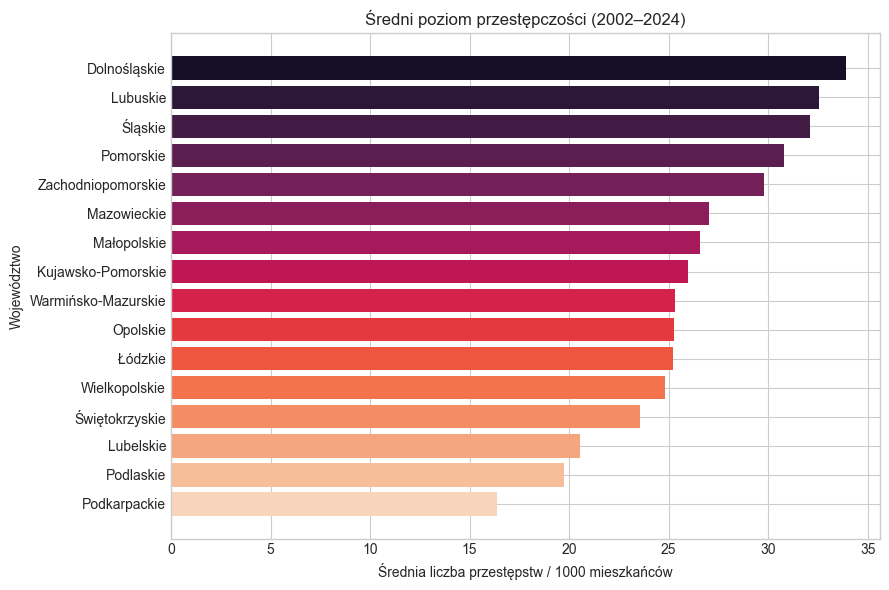

In [ ]:
mean_crime = df.groupby("unit")["crime"].mean().sort_values(ascending=False)

colors = sns.color_palette("rocket", n_colors=len(mean_crime))

plt.figure(figsize=(9,6))
plt.barh(mean_crime.index, mean_crime.values, color=colors)
plt.gca().invert_yaxis()

plt.title("Średni poziom przestępczości (2002–2024)")
plt.xlabel("Średnia liczba przestępstw / 1000 mieszkańców")
plt.ylabel("Województwo")
plt.tight_layout()
plt.show()


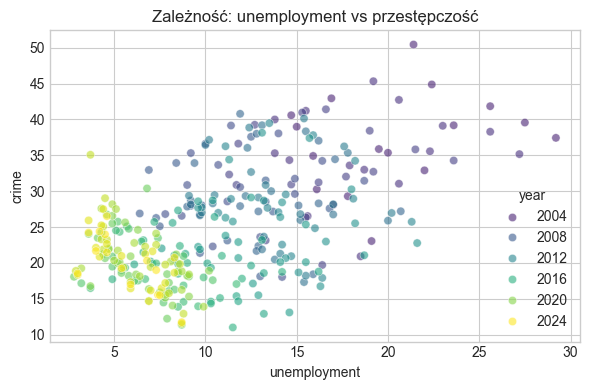

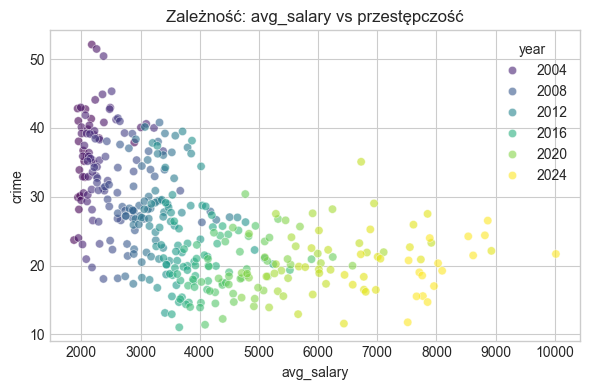

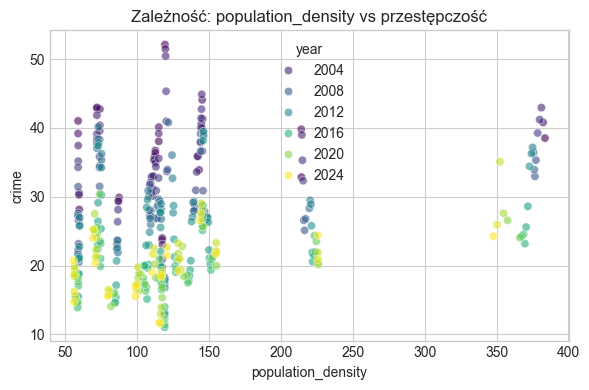

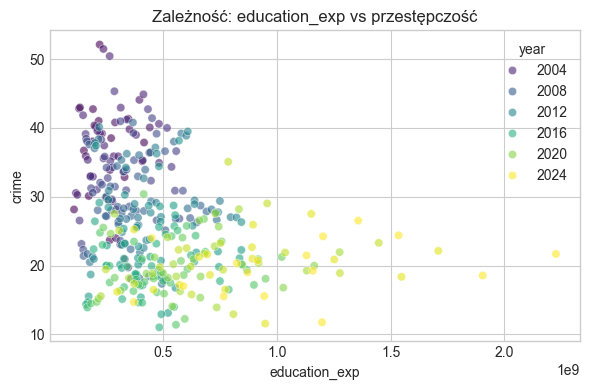

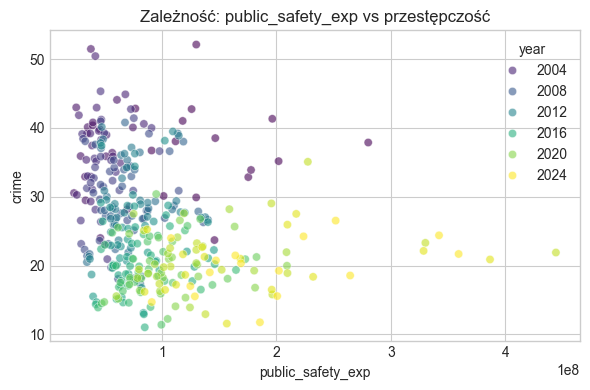

In [8]:
cols_to_plot = ["unemployment", "avg_salary", "population_density", "education_exp", "public_safety_exp"]

for c in cols_to_plot:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=c, y="crime", hue="year", palette="viridis", alpha=0.6)
    plt.title(f"Zależność: {c} vs przestępczość")
    plt.tight_layout()
    plt.show()

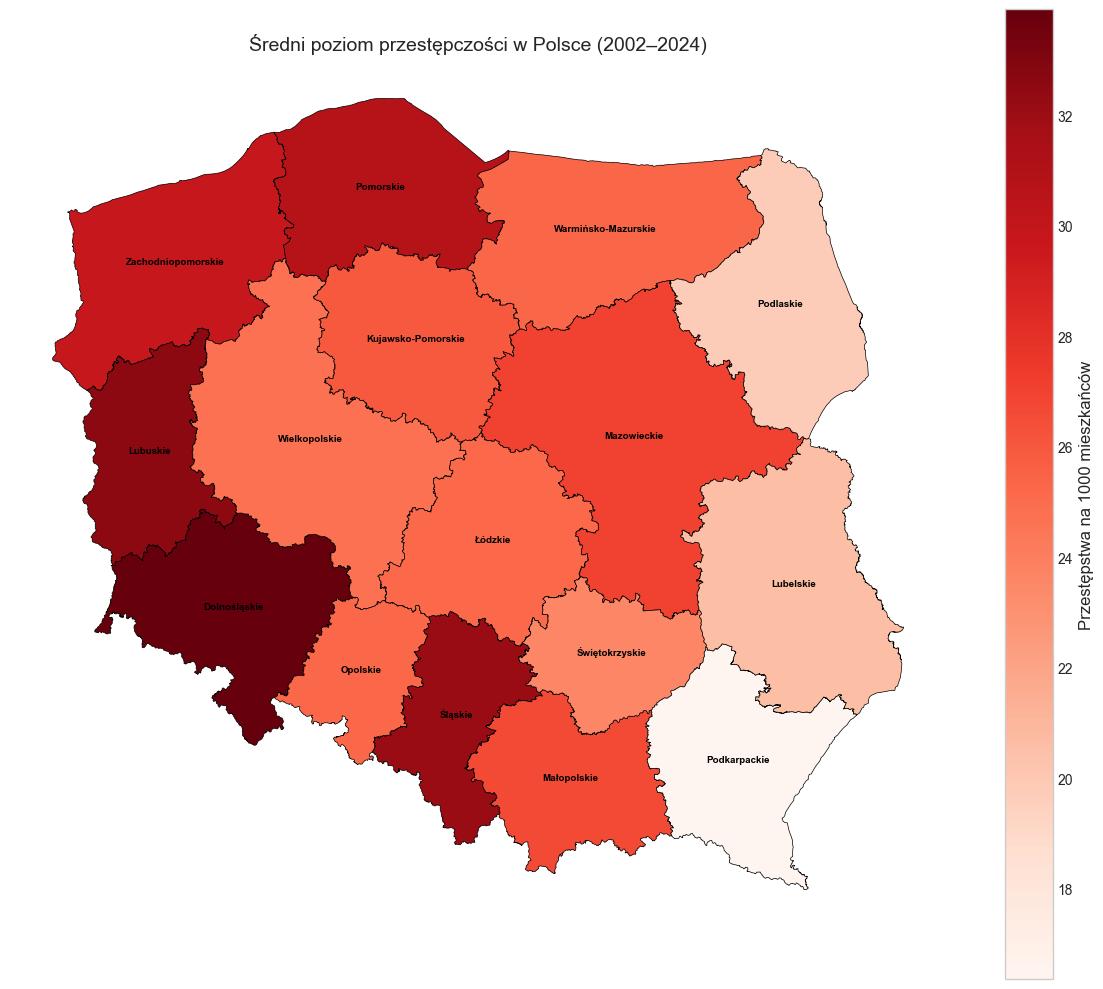

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/panel.csv")
mean_crime = df.groupby("unit")["crime"].mean().reset_index()

mapa = gpd.read_file("../data/shapefiles/wojewodztwa.shp")

mapa["JPT_NAZWA_"] = mapa["JPT_NAZWA_"].str.strip().str.title()
mean_crime["unit_norm"] = mean_crime["unit"].str.strip().str.title()

map_df = mapa.merge(mean_crime, left_on="JPT_NAZWA_", right_on="unit_norm", how="left")

fig, ax = plt.subplots(figsize=(12, 10))
map_df.plot(
    column="crime",
    cmap="Reds",
    legend=True,
    edgecolor="black",
    linewidth=0.5,
    ax=ax
)

for idx, row in map_df.iterrows():
    centroid = row.geometry.centroid
    plt.annotate(
        text=row["JPT_NAZWA_"],
        xy=(centroid.x, centroid.y),
        ha='center',
        fontsize=7,
        color="black",
        weight="bold"
    )

legend_ax = fig.axes[-1]
legend_ax.set_ylabel("Przestępstwa na 1000 mieszkańców", fontsize=12, fontweight="normal")

ax.set_title("Średni poziom przestępczości w Polsce (2002–2024)", fontsize=14)
ax.set_axis_off()
plt.tight_layout()
plt.show()


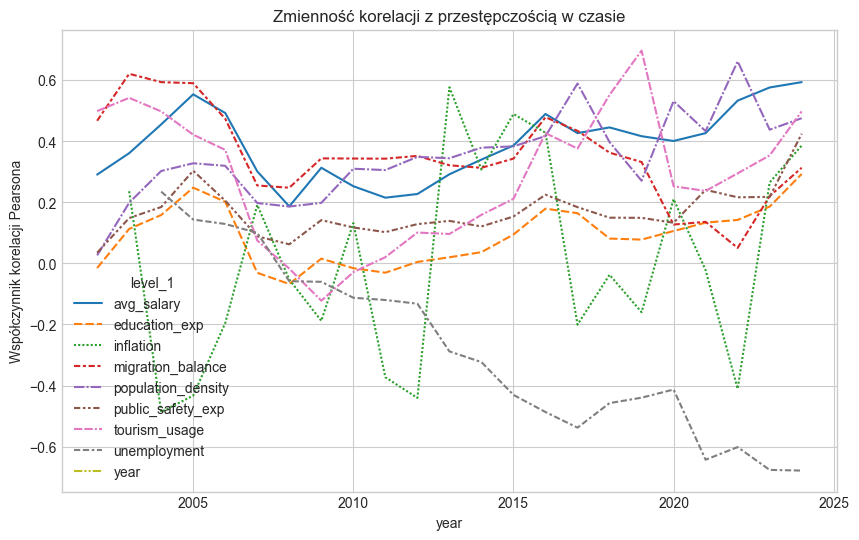

In [7]:
numeric_cols = df.select_dtypes(include="number").columns

corr_summary = (
    df.groupby("year")[numeric_cols]
    .corr()["crime"]
    .reset_index()[["year", "level_1", "crime"]]
    .pivot(index="year", columns="level_1", values="crime")
)

plt.figure(figsize=(10,6))
sns.lineplot(data=corr_summary.drop(columns=["crime"], errors="ignore"))
plt.title("Zmienność korelacji z przestępczością w czasie")
plt.ylabel("Współczynnik korelacji Pearsona")
plt.show()


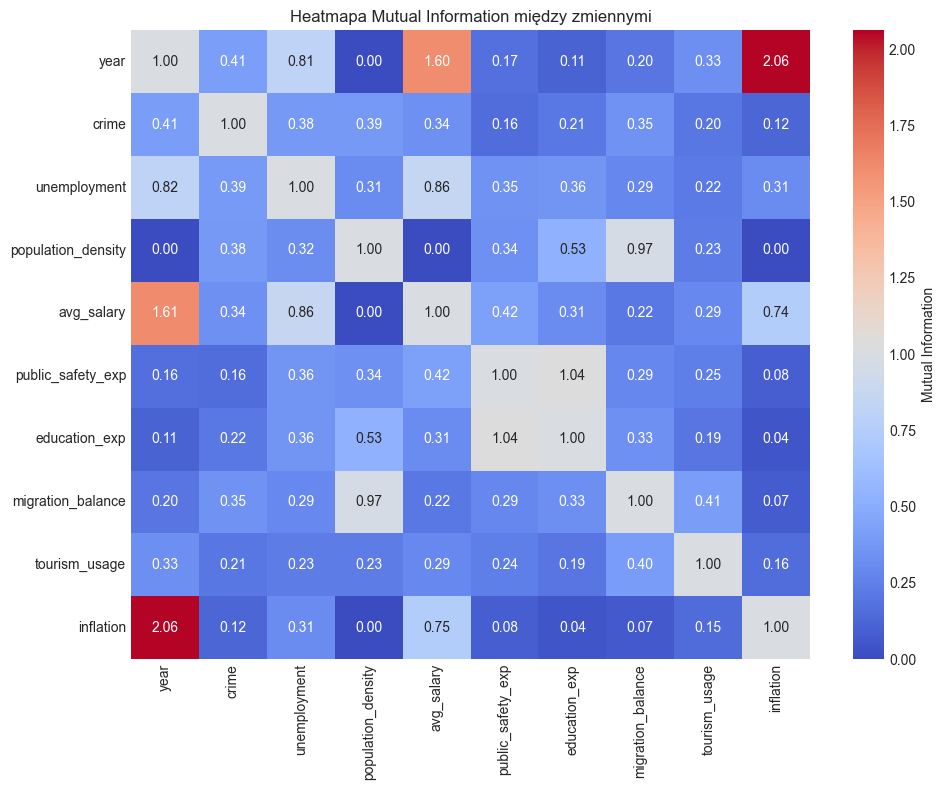

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Wczytanie danych
df = pd.read_csv("../data/processed/panel.csv")

# Kolumny numeryczne
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
data_numeric = df[numeric_cols].fillna(0)

# Tworzymy macierz MI
mi_matrix = pd.DataFrame(index=numeric_cols, columns=numeric_cols, dtype=float)

for col1 in numeric_cols:
    for col2 in numeric_cols:
        if col1 == col2:
            mi_matrix.loc[col1, col2] = 1.0
        else:
            x = data_numeric[col1].values.reshape(-1, 1)
            y = data_numeric[col2].values
            mi = mutual_info_regression(x, y, discrete_features=False)
            mi_matrix.loc[col1, col2] = mi[0]

# Rysowanie heatmapy
plt.figure(figsize=(10,8))
sns.heatmap(mi_matrix.astype(float), annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Mutual Information'})
plt.title("Heatmapa Mutual Information między zmiennymi")
plt.tight_layout()
plt.show()


In [ ]:
# 9️⃣ Podsumowanie
print("Analiza zakończona.")